# 参考資料
- [What is the feature importance returned by 'gain' ?](https://github.com/Microsoft/LightGBM/issues/1842)
- [Breiman et al（2001）, RANDOM FORESTS](https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf)

# Environment

## Libraries

In [26]:
import sys

sys.path.append("../")
import lightgbm as lgb
import matplotlib.pyplot as plt
import pandas as pd

from datamart import Datamart
from feature import Feature
from model import Model
from name import Name
from raw_data import RawData
from symbol_data import SymbolData

%matplotlib inline

## Functions

In [28]:
def create_datamart(
    ticker: str,
    num_lag: int = 5,
    days_before: int = 1,
    single_values: str = "close",
    nation: str = "US",
) -> pd.DataFrame:
    """データマートを生成する。"""
    name = Name(ticker, nation)
    ticker = name.ticker
    symbol_data = SymbolData(ticker).symbol_data
    raw_data = RawData(symbol_data).raw_data
    return Datamart(raw_data, single_values, num_lag, days_before, ticker).datamart

# Main

In [29]:
datamart_msft = create_datamart("msft")
datamart_dia = create_datamart("dia")
datamart_spy = create_datamart("spy")

In [30]:
features = Feature([datamart_dia, datamart_spy]).concat_datamarts()

In [32]:
model = Model(datamart_msft, features)

In [33]:
model.fit()

In [45]:
booster = model.clf.booster_

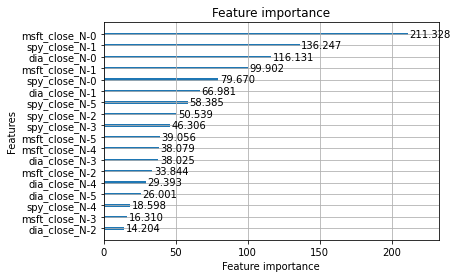

In [57]:
lgb.plot_importance(booster, importance_type="gain")
plt.show()

In [63]:
feat_imp = pd.DataFrame(
    {
        "特徴量": booster.feature_name(),
        "変数重要度": booster.feature_importance(importance_type="gain"),
    }
)
feat_imp["変数重要度"] = feat_imp["変数重要度"] / feat_imp["変数重要度"].sum()
tmp = (
    feat_imp.sort_values(by="変数重要度", ascending=False)
    .reset_index(drop=True)
    .reset_index()
)
tmp["index"] = tmp["index"] + 1
tmp.rename(columns={"index": "損失関数の減少に貢献したランキング"})

,損失関数の減少に貢献したランキング,特徴量,変数重要度
0,1,msft_close_N-0,0.188854
1,2,spy_close_N-1,0.121758
2,3,dia_close_N-0,0.103781
3,4,msft_close_N-1,0.089278
4,5,spy_close_N-0,0.071197
5,6,dia_close_N-1,0.059858
6,7,spy_close_N-5,0.052176
7,8,spy_close_N-2,0.045164
8,9,spy_close_N-3,0.041382
9,10,msft_close_N-5,0.034903
